# IMPORTING ALL THE LIBRARIES.

In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics.pairwise import euclidean_distances
from nltk.stem.porter import PorterStemmer
import seaborn as sns

# LOADING THE WEBSCRAPED DATASET.

In [2]:
data=pd.read_excel(r"C:\Users\pc\OneDrive\Desktop\DATASET_SCRAPPED_FROM_IMDb..xlsx")

In [3]:
data.head()

,Column1,title,year,time_duration,genre,rating,metascore,summary,director,crew,info,posterlink
0,0,The Shawshank Redemption,1994,142 min,Drama,9.3,82,"Over the course of several years, two convicts...",Frank Darabont,"Frank Darabont,Tim Robbins,Morgan Freeman,Bob ...",imdb.com/title/tt0111161/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE3OD...
1,1,The Godfather,1972,175 min,"Crime, Drama",9.2,100,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Francis Ford Coppola,Marlon Brando,Al Pacino,J...",imdb.com/title/tt0068646/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christopher Nolan,Christian Bale,Heath Ledger,...",imdb.com/title/tt0468569/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,3,Schindler's List,1993,195 min,"Biography, Drama, History",9.0,95,"In German-occupied Poland during World War II,...",Steven Spielberg,"Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben...",imdb.com/title/tt0108052/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE4OT...
4,4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,97,The jury in a New York City murder trial is fr...,Sidney Lumet,"Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Ba...",imdb.com/title/tt0050083/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMWU4N2...


In [7]:
data['crew']=[ i.replace(' ','') for i in data['crew']]
data['crew']=[i.replace(',',' ') for i in data['crew']]
data['crew']

0      FrankDarabont TimRobbins MorganFreeman BobGunt...
1      FrancisFordCoppola MarlonBrando AlPacino James...
2      ChristopherNolan ChristianBale HeathLedger Aar...
3      StevenSpielberg LiamNeeson RalphFiennes BenKin...
4      SidneyLumet HenryFonda LeeJ.Cobb MartinBalsam ...
                             ...                        
995    StephenFrears JudiDench SteveCoogan SophieKenn...
996    Jean-PierreJeunet AudreyTautou GaspardUlliel J...
997    ScottHicks GeoffreyRush ArminMueller-Stahl Jus...
998    JamesWhale ClaudeRains GloriaStuart WilliamHar...
999    DanielMonzón LuisTosar AlbertoAmmann AntonioRe...
Name: crew, Length: 1000, dtype: object

# # REMOVING '  | , | " | ; FROM THE SUMMARY WITH '' | '  ' | '' | '  ' |

In [8]:
data['summary']=[i.replace("'",'')for i in data['summary']]
data['summary']=[i.replace(",",' ')for i in data['summary']]
data['summary']=[i.replace(";",' ')for i in data['summary']]
data['summary']=[i.replace('"','')for i in data['summary']]

In [9]:
token=[]
for i in data['summary']:
    
    looping_list=[]
    k=i.split()
    
    for j in k:
        
        if j[-1]=='.':
            
            looping_list.append(j[0:len(j)-1])
        else:
            looping_list.append(j)
    token.append(looping_list)

In [10]:
token

[['Over',
  'the',
  'course',
  'of',
  'several',
  'years',
  'two',
  'convicts',
  'form',
  'a',
  'friendship',
  'seeking',
  'consolation',
  'and',
  'eventually',
  'redemption',
  'through',
  'basic',
  'compassion'],
 ['Don',
  'Vito',
  'Corleone',
  'head',
  'of',
  'a',
  'mafia',
  'family',
  'decides',
  'to',
  'hand',
  'over',
  'his',
  'empire',
  'to',
  'his',
  'youngest',
  'son',
  'Michael',
  'However',
  'his',
  'decision',
  'unintentionally',
  'puts',
  'the',
  'lives',
  'of',
  'his',
  'loved',
  'ones',
  'in',
  'grave',
  'danger'],
 ['When',
  'the',
  'menace',
  'known',
  'as',
  'the',
  'Joker',
  'wreaks',
  'havoc',
  'and',
  'chaos',
  'on',
  'the',
  'people',
  'of',
  'Gotham',
  'Batman',
  'must',
  'accept',
  'one',
  'of',
  'the',
  'greatest',
  'psychological',
  'and',
  'physical',
  'tests',
  'of',
  'his',
  'ability',
  'to',
  'fight',
  'injustice'],
 ['In',
  'German-occupied',
  'Poland',
  'during',
  'World'

In [11]:
data.head()

,Column1,title,year,time_duration,genre,rating,metascore,summary,director,crew,info,posterlink
0,0,The Shawshank Redemption,1994,142 min,Drama,9.3,82,Over the course of several years two convicts...,Frank Darabont,FrankDarabont TimRobbins MorganFreeman BobGunt...,imdb.com/title/tt0111161/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE3OD...
1,1,The Godfather,1972,175 min,"Crime, Drama",9.2,100,Don Vito Corleone head of a mafia family dec...,Francis Ford Coppola,FrancisFordCoppola MarlonBrando AlPacino James...,imdb.com/title/tt0068646/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84,When the menace known as the Joker wreaks havo...,Christopher Nolan,ChristopherNolan ChristianBale HeathLedger Aar...,imdb.com/title/tt0468569/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMTMxNT...
3,3,Schindler's List,1993,195 min,"Biography, Drama, History",9.0,95,In German-occupied Poland during World War II ...,Steven Spielberg,StevenSpielberg LiamNeeson RalphFiennes BenKin...,imdb.com/title/tt0108052/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE4OT...
4,4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,97,The jury in a New York City murder trial is fr...,Sidney Lumet,SidneyLumet HenryFonda LeeJ.Cobb MartinBalsam ...,imdb.com/title/tt0050083/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMWU4N2...


In [12]:
stopwords='''i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now'''

In [13]:
len(stopwords)

621

In [14]:
token_=[]
for i in token:
    looping_list=[]
    for j in i:
        if j.lower() not in stopwords:
            looping_list.append(j.lower())
    token_.append(looping_list)
data['processed_summary']=token_          

In [15]:
data.head()

,Column1,title,year,time_duration,genre,rating,metascore,summary,director,crew,info,posterlink,processed_summary
0,0,The Shawshank Redemption,1994,142 min,Drama,9.3,82,Over the course of several years two convicts...,Frank Darabont,FrankDarabont TimRobbins MorganFreeman BobGunt...,imdb.com/title/tt0111161/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE3OD...,"[course, several, years, two, convicts, form, ..."
1,1,The Godfather,1972,175 min,"Crime, Drama",9.2,100,Don Vito Corleone head of a mafia family dec...,Francis Ford Coppola,FrancisFordCoppola MarlonBrando AlPacino James...,imdb.com/title/tt0068646/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[vito, corleone, head, mafia, family, decides,..."
2,2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,84,When the menace known as the Joker wreaks havo...,Christopher Nolan,ChristopherNolan ChristianBale HeathLedger Aar...,imdb.com/title/tt0468569/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[menace, known, joker, wreaks, havoc, chaos, p..."
3,3,Schindler's List,1993,195 min,"Biography, Drama, History",9.0,95,In German-occupied Poland during World War II ...,Steven Spielberg,StevenSpielberg LiamNeeson RalphFiennes BenKin...,imdb.com/title/tt0108052/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE4OT...,"[german-occupied, poland, world, war, ii, indu..."
4,4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,97,The jury in a New York City murder trial is fr...,Sidney Lumet,SidneyLumet HenryFonda LeeJ.Cobb MartinBalsam ...,imdb.com/title/tt0050083/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[jury, new, york, city, murder, trial, frustra..."


In [16]:
data['genre']

0                          Drama
1                   Crime, Drama
2           Action, Crime, Drama
3      Biography, Drama, History
4                   Crime, Drama
                 ...            
995     Biography, Comedy, Drama
996      Drama, Mystery, Romance
997      Biography, Drama, Music
998               Horror, Sci-Fi
999         Action, Crime, Drama
Name: genre, Length: 1000, dtype: object

In [17]:
data['genre']= [i.replace(', ',",") for i in data['genre']]
data['genre']=[i.lower().split(',') for i in data['genre']]
data['processed_title'] =[i.lower() for i in data['title']]

In [18]:
data['genre']

0                          [drama]
1                   [crime, drama]
2           [action, crime, drama]
3      [biography, drama, history]
4                   [crime, drama]
                  ...             
995     [biography, comedy, drama]
996      [drama, mystery, romance]
997      [biography, drama, music]
998               [horror, sci-fi]
999         [action, crime, drama]
Name: genre, Length: 1000, dtype: object

In [19]:
title_=[]
for i in data['processed_title']:
    looping_list=[]

    k=i.split()
    for j in k:
        if j not in stopwords:
            looping_list.append(j)
    title_.append(looping_list)

In [20]:
data['processed_title']=title_

In [21]:
data.head()

,Column1,title,year,time_duration,genre,rating,metascore,summary,director,crew,info,posterlink,processed_summary,processed_title
0,0,The Shawshank Redemption,1994,142 min,[drama],9.3,82,Over the course of several years two convicts...,Frank Darabont,FrankDarabont TimRobbins MorganFreeman BobGunt...,imdb.com/title/tt0111161/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE3OD...,"[course, several, years, two, convicts, form, ...","[shawshank, redemption]"
1,1,The Godfather,1972,175 min,"[crime, drama]",9.2,100,Don Vito Corleone head of a mafia family dec...,Francis Ford Coppola,FrancisFordCoppola MarlonBrando AlPacino James...,imdb.com/title/tt0068646/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[vito, corleone, head, mafia, family, decides,...",[godfather]
2,2,The Dark Knight,2008,152 min,"[action, crime, drama]",9.0,84,When the menace known as the Joker wreaks havo...,Christopher Nolan,ChristopherNolan ChristianBale HeathLedger Aar...,imdb.com/title/tt0468569/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[menace, known, joker, wreaks, havoc, chaos, p...","[dark, knight]"
3,3,Schindler's List,1993,195 min,"[biography, drama, history]",9.0,95,In German-occupied Poland during World War II ...,Steven Spielberg,StevenSpielberg LiamNeeson RalphFiennes BenKin...,imdb.com/title/tt0108052/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE4OT...,"[german-occupied, poland, world, war, ii, indu...","[schindler's, list]"
4,4,12 Angry Men,1957,96 min,"[crime, drama]",9.0,97,The jury in a New York City murder trial is fr...,Sidney Lumet,SidneyLumet HenryFonda LeeJ.Cobb MartinBalsam ...,imdb.com/title/tt0050083/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[jury, new, york, city, murder, trial, frustra...","[12, angry, men]"


In [22]:
data['crew']=[i.lower().split() for i in data['crew']]

In [23]:
data.head()

,Column1,title,year,time_duration,genre,rating,metascore,summary,director,crew,info,posterlink,processed_summary,processed_title
0,0,The Shawshank Redemption,1994,142 min,[drama],9.3,82,Over the course of several years two convicts...,Frank Darabont,"[frankdarabont, timrobbins, morganfreeman, bob...",imdb.com/title/tt0111161/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE3OD...,"[course, several, years, two, convicts, form, ...","[shawshank, redemption]"
1,1,The Godfather,1972,175 min,"[crime, drama]",9.2,100,Don Vito Corleone head of a mafia family dec...,Francis Ford Coppola,"[francisfordcoppola, marlonbrando, alpacino, j...",imdb.com/title/tt0068646/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[vito, corleone, head, mafia, family, decides,...",[godfather]
2,2,The Dark Knight,2008,152 min,"[action, crime, drama]",9.0,84,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[christophernolan, christianbale, heathledger,...",imdb.com/title/tt0468569/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[menace, known, joker, wreaks, havoc, chaos, p...","[dark, knight]"
3,3,Schindler's List,1993,195 min,"[biography, drama, history]",9.0,95,In German-occupied Poland during World War II ...,Steven Spielberg,"[stevenspielberg, liamneeson, ralphfiennes, be...",imdb.com/title/tt0108052/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE4OT...,"[german-occupied, poland, world, war, ii, indu...","[schindler's, list]"
4,4,12 Angry Men,1957,96 min,"[crime, drama]",9.0,97,The jury in a New York City murder trial is fr...,Sidney Lumet,"[sidneylumet, henryfonda, leej.cobb, martinbal...",imdb.com/title/tt0050083/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[jury, new, york, city, murder, trial, frustra...","[12, angry, men]"


In [24]:
data['model_features']=data['processed_title']+data['genre']+data['crew']+data['processed_summary']

In [25]:
data.head()

,Column1,title,year,time_duration,genre,rating,metascore,summary,director,crew,info,posterlink,processed_summary,processed_title,model_features
0,0,The Shawshank Redemption,1994,142 min,[drama],9.3,82,Over the course of several years two convicts...,Frank Darabont,"[frankdarabont, timrobbins, morganfreeman, bob...",imdb.com/title/tt0111161/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE3OD...,"[course, several, years, two, convicts, form, ...","[shawshank, redemption]","[shawshank, redemption, drama, frankdarabont, ..."
1,1,The Godfather,1972,175 min,"[crime, drama]",9.2,100,Don Vito Corleone head of a mafia family dec...,Francis Ford Coppola,"[francisfordcoppola, marlonbrando, alpacino, j...",imdb.com/title/tt0068646/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[vito, corleone, head, mafia, family, decides,...",[godfather],"[godfather, crime, drama, francisfordcoppola, ..."
2,2,The Dark Knight,2008,152 min,"[action, crime, drama]",9.0,84,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[christophernolan, christianbale, heathledger,...",imdb.com/title/tt0468569/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[menace, known, joker, wreaks, havoc, chaos, p...","[dark, knight]","[dark, knight, action, crime, drama, christoph..."
3,3,Schindler's List,1993,195 min,"[biography, drama, history]",9.0,95,In German-occupied Poland during World War II ...,Steven Spielberg,"[stevenspielberg, liamneeson, ralphfiennes, be...",imdb.com/title/tt0108052/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE4OT...,"[german-occupied, poland, world, war, ii, indu...","[schindler's, list]","[schindler's, list, biography, drama, history,..."
4,4,12 Angry Men,1957,96 min,"[crime, drama]",9.0,97,The jury in a New York City murder trial is fr...,Sidney Lumet,"[sidneylumet, henryfonda, leej.cobb, martinbal...",imdb.com/title/tt0050083/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[jury, new, york, city, murder, trial, frustra...","[12, angry, men]","[12, angry, men, crime, drama, sidneylumet, he..."


In [26]:
data['genre']

0                          [drama]
1                   [crime, drama]
2           [action, crime, drama]
3      [biography, drama, history]
4                   [crime, drama]
                  ...             
995     [biography, comedy, drama]
996      [drama, mystery, romance]
997      [biography, drama, music]
998               [horror, sci-fi]
999         [action, crime, drama]
Name: genre, Length: 1000, dtype: object

In [27]:
porter_stemmer=PorterStemmer()

In [28]:
corpus=[]
[corpus.extend(i) for i in data['model_features']]
corpus=[i for i in corpus if i not in ['&','(best','(a.k.a','-','--','..']]

In [29]:
len(corpus)

24768

In [30]:
stemmed_corpus=[porter_stemmer.stem(i) for i in corpus]

In [31]:
corpus_=list(stemmed_corpus)
d={}
for i in corpus_:
    c=corpus_.count(i)
    d[i]=c
    corpus_.remove(i)
    



In [32]:
len(stemmed_corpus)

24768

In [33]:
vocabulary=sorted(d.items(),reverse=True,key=lambda x:x[1])
vocabulary_=[i[0] for i in vocabulary][0:5000] 
type(data.iloc[0].model_features)

list

In [34]:
len(vocabulary)

5557

In [35]:
model_features=[]
for i in data['model_features']:
    
    looping_string=''
    for j in i:
        
        looping_string=looping_string+porter_stemmer.stem(j)+" "
    looping_string=looping_string.strip()
    model_features.append(looping_string)

In [36]:
model_features

['shawshank redempt drama frankdarabont timrobbin morganfreeman bobgunton williamsadl cours sever year two convict form friendship seek consol eventu redempt basic compass',
 'godfath crime drama francisfordcoppola marlonbrando alpacino jamescaan dianekeaton vito corleon head mafia famili decid hand empir youngest son michael howev decis unintent put live love one grave danger',
 'dark knight action crime drama christophernolan christianbal heathledg aaroneckhart michaelcain menac known joker wreak havoc chao peopl gotham batman must accept one greatest psycholog physic test abil fight injustic',
 "schindler' list biographi drama histori stevenspielberg liamneeson ralphfienn benkingsley carolinegoodal german-occupi poland world war ii industrialist oskar schindler gradual becom concern jewish workforc wit persecut nazi",
 '12 angri men crime drama sidneylumet henryfonda leej.cobb martinbalsam johnfiedl juri new york citi murder trial frustrat singl member whose skeptic caution forc car

In [37]:
data['model_features']=model_features

In [38]:
data.head()

,Column1,title,year,time_duration,genre,rating,metascore,summary,director,crew,info,posterlink,processed_summary,processed_title,model_features
0,0,The Shawshank Redemption,1994,142 min,[drama],9.3,82,Over the course of several years two convicts...,Frank Darabont,"[frankdarabont, timrobbins, morganfreeman, bob...",imdb.com/title/tt0111161/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE3OD...,"[course, several, years, two, convicts, form, ...","[shawshank, redemption]",shawshank redempt drama frankdarabont timrobbi...
1,1,The Godfather,1972,175 min,"[crime, drama]",9.2,100,Don Vito Corleone head of a mafia family dec...,Francis Ford Coppola,"[francisfordcoppola, marlonbrando, alpacino, j...",imdb.com/title/tt0068646/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[vito, corleone, head, mafia, family, decides,...",[godfather],godfath crime drama francisfordcoppola marlonb...
2,2,The Dark Knight,2008,152 min,"[action, crime, drama]",9.0,84,When the menace known as the Joker wreaks havo...,Christopher Nolan,"[christophernolan, christianbale, heathledger,...",imdb.com/title/tt0468569/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[menace, known, joker, wreaks, havoc, chaos, p...","[dark, knight]",dark knight action crime drama christophernola...
3,3,Schindler's List,1993,195 min,"[biography, drama, history]",9.0,95,In German-occupied Poland during World War II ...,Steven Spielberg,"[stevenspielberg, liamneeson, ralphfiennes, be...",imdb.com/title/tt0108052/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BNDE4OT...,"[german-occupied, poland, world, war, ii, indu...","[schindler's, list]",schindler' list biographi drama histori steven...
4,4,12 Angry Men,1957,96 min,"[crime, drama]",9.0,97,The jury in a New York City murder trial is fr...,Sidney Lumet,"[sidneylumet, henryfonda, leej.cobb, martinbal...",imdb.com/title/tt0050083/?ref_=adv_li_tt,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[jury, new, york, city, murder, trial, frustra...","[12, angry, men]",12 angri men crime drama sidneylumet henryfond...


In [56]:
vectors=np.array(pd.read_pickle(r"C:\Users\pc\Downloads\tfidf_vectors.pkl"))
vectors[0].shape

(5557,)

# CREATING A CLASS COMPUTE THE K-MEANS ALGORITHM.

In [57]:
class kmeans():
    # CREATING A CONSTRUCTOR TO INITIALIZE THE NUMBER OF CENTROIDS , MAXIMUM ITERATIONS, INITIALIZE THE RANDOM CENTORIDS.
    def __init__(self,k=7,cycles=200):
        self.k=k # SETTING THE NUMBER OF CLUSTERS.                        
        print(self.k)
        self.cycles=cycles # NUMBER OF ITERATIONS NEEDED.
        self.initialize_index=random.sample(range(0,vectors.shape[0]),self.k)   # FINDING THE INDEX OF THE CENTROIDS FORM THE DATASET RANDOMLY.
        self.initialize_centroids=np.array(vectors)[self.initialize_index]      # SETTING THE CENTROID BASED ON THE VALUES OF THE OF INDEX FOUND IN PREVIOUS STEP.


    # ATTRIBUTE TO CREATE THE CLUSTER BASED ON THE EUCLIDEAN DISTANCE.    
    def create_cluster(self,vectors):
        
        cluster_=[]  # LIST TO FIND STORE TO WHICH CLUSTER THE DATAPOINT BELONGS.
        for datapoint in vectors:               
            distance=[] # LIST TO STORE THE DISTANCE BETWEEN THE CENTROIDS AND THE CURRENT DATAPOINT.
            for centroid in self.initialize_centroids:
            
                d=np.sqrt(np.dot(datapoint-centroid,datapoint-centroid))
                #print((centroid-datapoint).shape)

                distance.append(d)
            minimum_distance=min(distance)     # FINDING THE MINIMUM DISTANCE.
            idx=distance.index(minimum_distance)
            cluster_.append(idx)  # ASSIGNING THE CLUSTER INDEX TO THE GIVEN DATAPOINT.
        return(np.array(cluster_))
    
    # ATTRIBUTE TO UPDATE THE CENTROID BASED ON THE LAST CLUSTER FORMATION.
    def update_centroids(self,cluster):
        new_centroids=[]
        cluster_groups=np.unique(cluster) # FINDING THE TOTAL NUMBER OF UNIQUE CLUSTERS.
        for i in cluster_groups:
            new_centroids.append(vectors[cluster==i].mean(axis=0)) # FINDING THE MEAN OF ALL THE DIMENSIONS OF ALL THE DATAPOINT WITHIN A CLUSTER AND ASSIGNING THIS MEAN POINT AS NEW CENTROID.
        return(np.array(new_centroids))
    

    # ATTRIBUTE WHICH IS USED TO FIND GENERATE THE CLUSTER AND ALSO TO UPDATE IT BASED UPON THE LAST CLUSTER FORMATION.
    def create_model(self,vectors):
        for i in range(0,self.cycles):
            cluster=self.create_cluster(vectors)  # CREATING THE CLUSTERS.
            old_centroids=self.initialize_centroids 
            self.initialize_centroids=self.update_centroids(cluster)  # UPDATING THE CLUSTERS.
            if (old_centroids.all()==self.initialize_centroids.all()):  # STPING THE UPDATE OF THE CLUSTERS IF THE PREVIOUS CENTROID CONCIDE WITH NEW CENTROIDS.
                break
        return(cluster)  # RETURNING THE CLUSTERS FORMED.

# CREATING THE OBJECT THE CLASS kmeans.

In [58]:
KMEANS=kmeans()

7


# USING THE CLASS ATTRIBUTE TO CREATE THE CLUSTERS.

In [59]:
a=KMEANS.create_model(vectors)

(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)
(5557,)


# FUNCTION TO FIND THE SIMIALR MOVIES BASED ON THE USER ENTERED MOVIE.

In [91]:
def similar_movies(movie,a):
    movie_index=data[data['title']==movie].Column1 # FINDING THE INDEX OF THE MOVIE ENTERED.
    vector_of_the_entered_movie=vectors[movie_index] # VECTOR OF THE ENTERED MOVIE.
    cluster_to_which_movie_belong=a[movie_index] # FINDING THE CLUSTER TO WHICH THE MOVIE BELONGS.
    similar_movies_index=[] # LIST TO STORE THE MOVIES IN THE SAME CLUSTER.
    similar_movies_vectors=[] # LIST TO STORE THE VECTORS OF THE MOVIES IN THE SAME CLUSTER.
    for i in range(0,len(a)):
        if cluster_to_which_movie_belong==a[i]:
            similar_movies_index.append(i)
           # print(data.iloc[i].title)
    for i in similar_movies_index:
        similar_movies_vectors.append(vectors[i])
    idx_of_very_similar_movies=[]
    very_similar_movies=[]
    distance=find_8_very_similar_movies(np.array(similar_movies_vectors),np.array(vector_of_the_entered_movie)) # FINDING THE 8 VERY SIMILAR MOVIES.
    #print(vector_of_the_entered_movie)
    #print(np.array(vector_of_the_entered_movie).shape)
    for i in distance:
        idx_of_very_similar_movies.append(similar_movies_index[i[0]])
    for i in idx_of_very_similar_movies:
        very_similar_movies.append(data.iloc[i].title)
    print(very_similar_movies)

# FUNCTION TO FIND 8 VERY SIMILAR  MOVIES.

In [92]:
def find_8_very_similar_movies(similar_movies_vectors,vector_of_entered_movie):
    d=[]
    for i in (similar_movies_vectors):
    
        #print((i-vector_of_entered_movie).shape)
        d.append(np.sqrt(np.dot((i-vector_of_entered_movie).reshape(-1),(i-vector_of_entered_movie).reshape(-1)))) # HERE I AM RESHAPING THE (i-vector_of entered_movie) as shape of vector of entered movie is 
                                                                                                                   #(1,5557) DUE TO WHCIH I AM NOT ABLE TO FIND THE dot product directly.                                                                                                                
    d=sorted(list(enumerate(d)),key=lambda x:x[1])
    return(d)

In [93]:
movie='3 Idiots'
similar_movies(movie,a)

['3 Idiots', 'Chhichhore', 'Dil Chahta Hai', 'Perfetti sconosciuti', 'Fantasia', 'Paan Singh Tomar', 'The Fall', 'The Broken Circle Breakdown', 'Idi i smotri', 'Hoje Eu Quero Voltar Sozinho', 'Verdens verste menneske', 'PK', 'Dom za vesanje', 'Cowboy Bebop: Tengoku no tobira', 'The Imitation Game', 'Zindagi Na Milegi Dobara', 'Majo no takkyûbin', 'Papillon', 'Star Wars', 'Wonder', 'Silver Linings Playbook', 'Kick-Ass', 'Les choristes', 'Rocketry: The Nambi Effect', 'The Wizard of Oz', 'Star Trek II: The Wrath of Khan', 'Kaguya-hime no monogatari', 'La double vie de Véronique', 'Back to the Future', 'The Green Mile', 'Jungfrukällan', 'The Wolf of Wall Street', 'Amores perros', 'The Others', "L'avventura", 'Pink', 'Baby', 'The Butterfly Effect', 'Andhadhun', 'Bajrangi Bhaijaan', 'En man som heter Ove', 'Au revoir les enfants', 'Le salaire de la peur', 'Snow White and the Seven Dwarfs', 'Captain Fantastic', 'This Is England', 'The Birds', 'Rushmore', 'Diarios de motocicleta', 'Taare Zamee

In [68]:
b=pd.DataFrame(a)

In [69]:
b

,0
0,1
1,1
2,1
3,1
4,1
...,...
995,1
996,1
997,1
998,1


1    994
0      4
2      2
Name: 0, dtype: int64

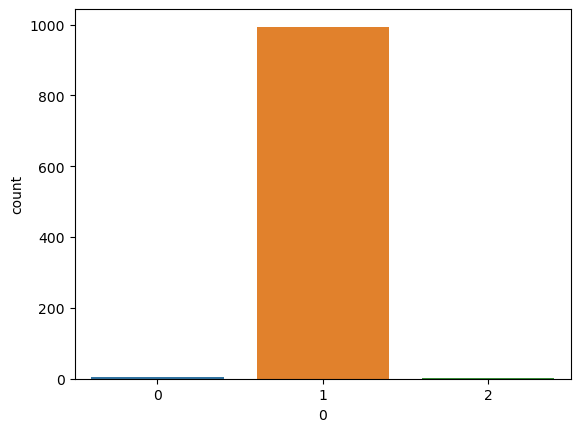

In [70]:
sns.countplot(x=b[0])
b[0].value_counts()